In [1]:
# importing libraries 
from bs4 import BeautifulSoup 
import requests 

In [2]:
# instagram URL 
URL = "https://www.instagram.com/{}/"

In [3]:
# parse function 
def parse_data(s): 
      
    # creating a dictionary 
    data = {} 
      
    # splittting the content  
    # then taking the first part 
    s = s.split("-")[0] 
      
    # again splitting the content  
    s = s.split(" ") 
      
    # assigning the values 
    data['Followers'] = s[0] 
    data['Following'] = s[2] 
    data['Posts'] = s[4] 
      
    # returning the dictionary 
    return data

In [4]:
# scrape function 
def scrape_data(username): 
      
    # getting the request from url 
    r = requests.get(URL.format(username)) 
      
    # converting the text 
    s = BeautifulSoup(r.text, "html.parser") 
      
    # finding meta info 
    meta = s.find("meta", property ="og:description") 
    
    # calling parse method 
    return parse_data(meta.attrs['content']) 

In [13]:
  # main function 
if __name__=="__main__": 
    
      
    # user name 
    usernames=["daurcomm","radioqaum","aahatadotcom","react.please","daur_ed","thevirtualnetwork"]
    followers_count=[]
    #username = "the_drunken_astronaut"
    for username in usernames:
        
    # calling scrape function 
        data = scrape_data(username) 
        followers_count.append(data['Followers'])
    # printing the info 
    followers_count = [int(i) for i in followers_count] 
    print(followers_count) 

[942, 435, 806, 108, 126, 844]


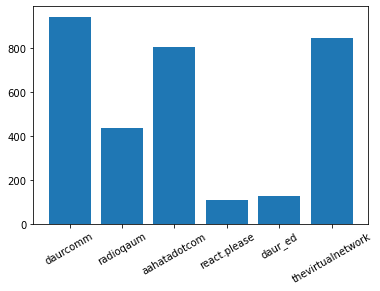

In [17]:
import matplotlib.pyplot as plt
plt.bar(usernames,followers_count)
plt.xticks(rotation=30)
plt.show()